# Detailed Mathematical Explanation of SVD

- **Matrix Factorization:** SVD is a method of decomposing a matrix $A$ into three matrices $U$, $\Sigma$, and $V^T$ such that:
  $$  A = U \Sigma V^T $$
  
  
  where:
  - $U$ is an $m \times m$ orthogonal matrix whose columns are the left singular vectors of $A$.
  - $\Sigma$ is an $m \times n$ diagonal matrix with non-negative real numbers on the diagonal, known as singular values.
  - $V^T$ is the transpose of an $n \times n$ orthogonal matrix whose columns are the right singular vectors of $A$.

- **Orthogonality of $U$ and $V$:**
  - The columns of $U$ and $V$ are orthonormal, meaning that $U^T U = I$ and $V^T V = I$, where $I$ denotes the identity matrix.


- **Singular Values:**
  - The diagonal entries of $\Sigma$ are called the singular values of $A$ and are denoted by $\sigma_1, \sigma_2, \dots, \sigma_r$ (with $r \leq \min(m, n)$). These are ordered such that $\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_r \geq 0$.
  - Singular values provide insights into the "strength" or "importance" of the corresponding singular vectors in the matrix structure.


- **Geometric Interpretation:**
  - The transformation $A$ can be seen as stretching the unit sphere into an ellipsoid in $R^n$, where the singular values are the lengths of the semi-axes of the ellipsoid.

## Notes:
- Understanding SVD involves recognizing how a matrix can be broken down into simpler, meaningful components. Each component $U$, $\Sigma$, and $V^T$ has a distinct role in transforming data.
- The singular values in $\Sigma$ represent the magnitude of each axis of the transformation, showing the importance of each dimension in the dataset.
- This decomposition is particularly powerful because it reveals not just how data is structured but also the inherent relationships within the data, making it invaluable for complex data analyses and applications like compression, noise reduction, and more.


**Purpose:**
SVD is used for a variety of applications, including solving linear systems, computing pseudoinverses, data compression, and dimensionality reduction.

**Characteristics:**
- Applicable to any $m \times n$ matrix.
- Provides information about the rank, range, and null space of the matrix.
- Singular values relate to the eigenvalues of $A^T A$ or $A A^T$.

**Applications:**
- Low-rank approximations: Useful in data compression and noise reduction.
- Solving linear least squares problems.
- Computing pseudoinverses for non-square or singular matrices.
- Principal Component Analysis (PCA) for dimensionality reduction.


## Step-by-Step SVD Decomposition Using NumPy

1. **Import NumPy Library**

In [4]:
import numpy as np

2. **Create a Matrix**
   Define the matrix that you want to decompose.

In [6]:
A = np.array([[1, 2], [3, 4], [5, 6]])
# A = np.array([[1, 2, 3], [4, 5, 6]])
A

array([[1, 2],
       [3, 4],
       [5, 6]])

3. **Compute Transpose and Multiplication**
   Compute $ A^T A $ and $AA^T$ which are needed to find the right and left singular vectors.

In [7]:
ATA = np.dot(A.T, A)
AAT = np.dot(A, A.T)
ATA

array([[35, 44],
       [44, 56]])

In [8]:
AAT

array([[ 5, 11, 17],
       [11, 25, 39],
       [17, 39, 61]])

4. **Eigenvalue Decomposition**
   Perform eigenvalue decomposition on $ A^T A $ and $ AA^T $.

In [9]:
e_vals, e_vecs = np.linalg.eig(ATA)
e_vals

array([ 0.26450509, 90.73549491])

In [10]:
np.sqrt(-10)

C:\Users\Prashant\AppData\Local\Temp\ipykernel_20548\1393014705.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(-10)


nan

In [11]:
u_vals, u_vecs = np.linalg.eig(AAT)
u_vals

array([ 9.07354949e+01,  2.64505087e-01, -2.64546212e-15])

5. **Sort Eigenvalues and Eigenvectors**
   The singular values are the square roots of the eigenvalues of $A^T A$. Sort them (and corresponding vectors) by magnitude in descending order.


In [12]:
sorted_indices = np.argsort(e_vals)[::-1]
e_vals = e_vals[sorted_indices]
e_vecs = e_vecs[:, sorted_indices]

singular_values = np.sqrt(e_vals)
singular_values

array([9.52551809, 0.51430058])

6. **Form Diagonal Matrix $\Sigma$**
   Create $\Sigma$ from the sorted singular values.
   

In [13]:
Sigma = np.zeros(A.shape)
np.fill_diagonal(Sigma, singular_values)

In [14]:
Sigma

array([[9.52551809, 0.        ],
       [0.        , 0.51430058],
       [0.        , 0.        ]])

7. **Compute $V$ and $ U $ Matrices**
   Ensure the left singular vectors (U) are normalized.
   

In [118]:
U = u_vecs   # eig_vectores from AAT
V = e_vecs   # eig_vectores from ATA
U,  V

(array([[-0.92236578, -0.3863177 ],
        [ 0.3863177 , -0.92236578]]),
 array([[-0.42866713, -0.80596391,  0.40824829],
        [-0.56630692, -0.11238241, -0.81649658],
        [-0.7039467 ,  0.58119908,  0.40824829]]))

8. **Reconstruct Original Matrix**
   Verify the decomposition by reconstructing $ A $.

In [80]:
A_reconstructed = np.dot(U, np.dot(Sigma, V.T))
A_reconstructed

array([[ 4.,  5.,  6.],
       [-1., -2., -3.]])

# Using SciPy for SVD

Using SciPy, the SVD process is much more straightforward and handles numerical stability better.

1. **Import SciPy Library**

In [98]:
from scipy.linalg import svd

# A = 

2. **Perform SVD**
   Directly apply the SVD function.
   

In [99]:
U, s, VT = svd(A)

In [100]:
U

array([[-0.3863177 ,  0.92236578],
       [-0.92236578, -0.3863177 ]])

In [101]:
s

array([9.508032  , 0.77286964])

In [102]:
VT

array([[-0.42866713, -0.56630692, -0.7039467 ],
       [-0.80596391, -0.11238241,  0.58119908],
       [ 0.40824829, -0.81649658,  0.40824829]])

3. **Form Diagonal Matrix $\Sigma$ from s**

In [103]:
Sigma = np.diag(s)  # creating a diagonal matrix using the vector s
Sigma

array([[9.508032  , 0.        ],
       [0.        , 0.77286964]])

4. **Reconstruct Original Matrix**
   Use the U, Sigma, and VT matrices to reconstruct $ A $.

In [104]:
A_reconstructed = np.dot(U, np.dot(Sigma, VT))

ValueError: shapes (2,2) and (3,3) not aligned: 2 (dim 1) != 3 (dim 0)

The error you're encountering occurs because the dimensions of the matrices involved in the matrix multiplication are not aligned properly. This is a common issue when reconstructing matrices from their SVD components, particularly when the original matrix $ A $ is not square (i.e., $ m \neq n $).

In SVD, $ U $, $ \Sigma $, and $ V^T $ have specific shapes:
- $ U $ is $ m \times m $,
- $ \Sigma $ (as returned by `svd` in its minimal form) is $ \min(m, n) \times \min(m, n) $,
- $ V^T $ is $ n \times n $.

For a non-square $ A $ of size $ m \times n $:
- If $ m > n $, $ \Sigma $ will be smaller than $ U $ in one dimension and smaller than $ V^T $ in the other, meaning direct multiplication won't work because of mismatched dimensions.

Here's how you can fix this:

### Correct Reconstruction for Non-Square Matrices Using NumPy

If you have used `scipy.linalg.svd` and retained the minimal $ \Sigma $ (which is typically a 1D array of singular values), you need to construct the full $ \Sigma $ matrix properly to match the dimensions of $ U $ and $ V^T $.

Here’s the revised approach:

In [91]:
import numpy as np
from scipy.linalg import svd

# Example non-square matrix
# A = np.array([[1, 2], [3, 4], [5, 6]])
A = np.array([[1, 2, 3], [4, 5, 6]])

In [92]:
# Perform SVD
U, s, VT = svd(A, full_matrices=False)

In [97]:
U, s, VT

(array([[-0.3863177 ,  0.92236578],
        [-0.92236578, -0.3863177 ]]),
 array([9.508032  , 0.77286964]),
 array([[-0.42866713, -0.56630692, -0.7039467 ],
        [-0.80596391, -0.11238241,  0.58119908]]))

In [93]:
# Construct full Sigma matrix with correct dimensions
Sigma = np.zeros((U.shape[1], VT.shape[0]))
Sigma

array([[0., 0.],
       [0., 0.]])

In [94]:
np.fill_diagonal(Sigma, s)

In [95]:
# Reconstruct original matrix
A_reconstructed = np.dot(U, np.dot(Sigma, VT))

print(A_reconstructed)

[[1. 2. 3.]
 [4. 5. 6.]]


### Key Adjustments:

1. **`full_matrices=False` in `svd` function**: This ensures that $ U $ and $ V^T $ are returned in reduced form, i.e., $ U $ will be $ m \times \min(m, n) $ and $ V^T $ will be $ \min(m, n) \times n $.
2. **Constructing $ \Sigma $**: Instead of using `np.diag(s)`, which only works if $ m = n $, the code now initializes $ \Sigma $ as a zero matrix of appropriate size and fills its diagonal with the singular values stored in `s`. This matches $ \Sigma $'s dimensions correctly with those of $ U $ and $ V^T $ for matrix multiplication.

This method should resolve the dimension mismatch and successfully reconstruct the original matrix $ A $ from its SVD components.

# Orthogonal Matrices

### Definition of Orthogonal Matrices

An **orthogonal matrix** is a square matrix $ Q $ whose columns and rows are orthogonal unit vectors (orthonormal vectors). In simpler terms, this means that when a matrix is orthogonal, multiplying it by its transpose results in the identity matrix. Mathematically, this is represented as:
$$ Q^T Q = Q Q^T = I $$
where $ Q^T $ is the transpose of $ Q $, and $ I $ is the identity matrix of appropriate size.

### Important Properties of Orthogonal Matrices

1. **Preservation of Length (Norm):**
   - Orthogonal transformations (represented by orthogonal matrices) preserve the length (norm) of vectors. If $ \mathbf{v} $ is any vector, then $ \| Q\mathbf{v} \| = \| \mathbf{v} \| $. This property is crucial in many applications, including those in computer graphics and numerical methods, where maintaining the original length of vectors during transformations is necessary.

2. **Preservation of Angle:**
   - Orthogonal matrices preserve the angles between vectors. If $ \mathbf{u} $ and $ \mathbf{v} $ are vectors, then the angle between $ Q\mathbf{u} $ and $ Q\mathbf{v} $ is the same as the angle between $ \mathbf{u} $ and $ \mathbf{v} $. This is particularly useful in preserving the geometric properties of figures during transformations.

3. **Inverse is Equal to Transpose:**
   - The inverse of an orthogonal matrix is equal to its transpose: $ Q^{-1} = Q^T $. This simplifies computations involving matrix inversions, as calculating the transpose is generally more straightforward and computationally cheaper than finding the inverse.

4. **Determinant Values:**
   - The determinant of an orthogonal matrix is always $ \pm 1 $. This arises from the property that the product of the eigenvalues (which are all $ \pm 1 $ for orthogonal matrices) equals the determinant. The sign $ +1 $ indicates a rotation while $ -1 $ indicates a reflection combined with a rotation.

5. **Stability in Numerical Computations:**
   - Orthogonal matrices are numerically stable in computations, which makes them valuable in complex numerical calculations where minimizing error propagation is critical. For example, in algorithms like QR factorization used in solving linear systems, eigenvalue computations, and more.

6. **Eigenvalues on the Unit Circle:**
   - The eigenvalues of an orthogonal matrix lie on the unit circle in the complex plane. This means their absolute values are 1, reflecting the preservation of vector norms.

### Applications

Orthogonal matrices are widely used across various fields such as physics, engineering, computer graphics, and statistics. They are pivotal in transformations that require maintaining the original structure of data, such as rotations in space, reflecting shapes, and changing bases in vector spaces without distorting the vector magnitudes or angles.


# Comparison of SVD with PCA

- **PCA and SVD Relationship**: PCA can be viewed as a specific application of SVD. When performing PCA, we center the data (subtract the mean of each feature) and then perform SVD on the centered data matrix \( X \). The principal components obtained from PCA are equivalent to the right singular vectors \( V \) of the SVD of the centered data matrix.
  
- **Dimensionality Reduction**: Both PCA and SVD aim to reduce dimensionality by identifying the directions (components or singular vectors) that capture the most variance in the data. PCA focuses on maximizing variance, while SVD provides a more general decomposition applicable to any matrix, not necessarily centered.

- **Application**: PCA is often preferred when the primary goal is to analyze variance and identify principal directions. SVD is more versatile and can be applied directly to matrices without centering, making it suitable for a wider range of applications such as signal processing, image compression, and natural language processing.


# Image Compression with SVD (Dimensionality Reduction Example)

**Applications of SVD in Image Analysis:**

- **Image Compression**:This can significantly reduce file sizes, especially when the original image contains redundant information or if high precision is not necessary.
- **Noise Reduction**: Perform SVD, discard the smaller singular values, and reconstruct the image using only the significant components.
- **Feature Extraction**: The components U , Sigma & V, from SVD can serve as features that summarize the original image efficiently. These features can be very effective for image classification, facial recognition, and other image-based machine learning models because they capture essential patterns in the image data.    
        

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.color import rgb2gray

SVD can be applied to reduce the dimensionality of a dataset by truncating the matrices $ U $, $ \Sigma $, and $ V $ to keep only the top $ k $ singular values and their corresponding singular vectors. The steps involved are:

1. Perform SVD on the data matrix $ A $:
   $$ A = U \Sigma V^T $$
2. Select the top $ k $ singular values and their corresponding vectors to form $ U_k $, $ \Sigma_k $, and $ V_k $.
3. Project the data onto the reduced space:
   $$ A_k = U_k \Sigma_k V_k^T $$

where $ U_k $ consists of the first $ k $ columns of $ U $, $ \Sigma_k $ is the $ k \times k $ diagonal matrix containing the largest $ k $ singular values, and $ V_k $ consists of the first $ k $ columns of $ V $.

This results in a reduced representation of the original data that captures the most significant features.

In [126]:
# Load an example image and convert to grayscale
image = img_as_float(rgb2gray(data.astronaut()))
U, s, VT = np.linalg.svd(image, full_matrices=False)
S = np.diag(s)

In [127]:
# Number of singular values to use for reconstructing the compressed image
k = 50

In [128]:
# Reconstruct the image using the first k singular values/components
compressed_image = np.dot(U[:, :k], np.dot(S[:k, :k], VT[:k, :]))

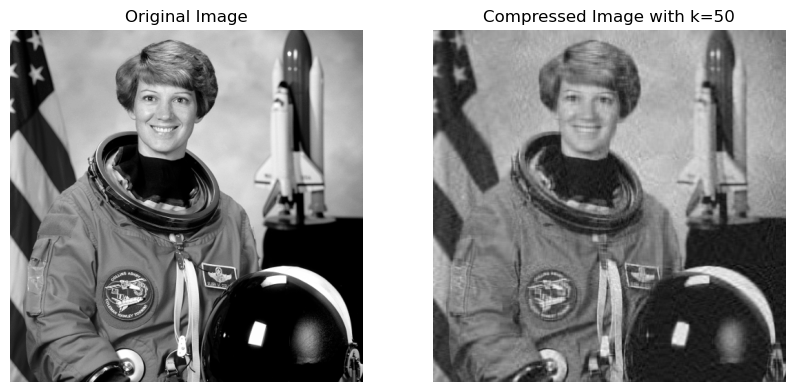

In [129]:
# Plot the original and compressed image
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')
ax[1].imshow(compressed_image, cmap='gray')
ax[1].set_title('Compressed Image with k=' + str(k))
ax[1].axis('off')
plt.show()